# 1. importation des librairies et preparation des données

## 1.1 importation des librairies

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

## 1.2 importation des dataframes

In [3]:
erp = pd.read_csv('../DA-P5/sources/erp.csv', sep=";")
web = pd.read_csv('../DA-P5/sources/web.csv', sep=";")
link = pd.read_csv('../DA-P5/sources/liaison.csv', sep=";")

## 1.3 preparation des dataframes

In [4]:
# verification de l'unicité des identifiants
print(f'le fichier erp possède {len(erp)} lignes')
print(f"la colonne product_id posséde {len(erp['product_id'].unique())} valeurs uniques")
print(f'Chaque product_id est donc bien unique et peux servir de clef primaire')


le fichier erp possède 825 lignes
la colonne product_id posséde 825 valeurs uniques
Chaque product_id est donc bien unique et peux servir de clef primaire


In [5]:
# verification de la table de liaison
print(f'le fichier link possède {len(link)} lignes')
print(f"la colonne product_id posséde {len(link['product_id'].unique())} valeurs uniques")
print(f'Le fichier de liaison posséde autant de lignes que le fichier erp, \n'
      f'une liaison devrait donc etre possible, en se basant sur la colonne product_id')

le fichier link possède 825 lignes
la colonne product_id posséde 825 valeurs uniques
Le fichier de liaison posséde autant de lignes que le fichier erp, 
une liaison devrait donc etre possible, en se basant sur la colonne product_id


In [6]:
# fusion du fichier erp et de la table de liaison, puis preparation pour la fusion avec fichier web

temp = pd.merge(erp, link, on='product_id', how='left')
print(f'le nouveau fichier, resultat de la fusion entre le fichier erp et le fichier de liaison possède {len(temp)} lignes,\n'
      f"soit autant que les fichiers erp et link, la fusion semble donc s'être passée correctement")
print(f"la colonne id_web posséde {len(temp['id_web'].unique())} valeurs uniques, et {len(temp[temp['id_web'].isna()])} valeurs manquantes")
temp = temp.dropna(subset=["id_web"], axis=0)

le nouveau fichier, resultat de la fusion entre le fichier erp et le fichier de liaison possède 825 lignes,
soit autant que les fichiers erp et link, la fusion semble donc s'être passée correctement
la colonne id_web posséde 735 valeurs uniques, et 91 valeurs manquantes


In [7]:
# preparation du fichier web
web.rename(columns={'sku':'id_web'}, inplace=True)
print(f'le fichier web possède {len(web)} lignes')
print(f"la colonne id_web possède {len(web['id_web'].unique())} valeurs uniques")
web = web.sort_values(by=['id_web'], axis=0)
display(web[:10])
print(f'Chaque produit apparait 2 fois dans le fichier, une ligne pour le produit, \n'
'et une ligne pour le meme produit, avec le lien vers la photo')
web.drop(web.loc[web['post_type']=='attachment'].index, inplace=True)
print('On enleve toutes les lignes inutiles')
print(f'Il reste {len(web)} lignes apres supressions des doublons')
print(f"La colonne id_web du fichier web possède {len(web[web['id_web'].isna()])} valeurs manquantes")
web = web.dropna(subset=["id_web"], axis=0)
print(f'Il reste {len(web)} lignes apres supressions des valeurs manquantes')


le fichier web possède 1513 lignes
la colonne id_web possède 715 valeurs uniques


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,NaN,publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1046,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,NaN,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1106,10775,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,NaN,Albert Mann Pinot Gris Vendanges Tardives Alte...,NaN,publish,closed,closed,NaN,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
321,10775,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 21:28:52,2018-04-17 19:28:52,NaN,Albert Mann Pinot Gris Vendanges Tardives Alte...,Belle bouteille dotée d’une grande complexité ...,publish,closed,closed,NaN,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1072,10814,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,NaN,Thierry Germain Saumur-Champigny Outre Terre 2013,NaN,publish,closed,closed,NaN,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
281,10814,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 10:12:40,2018-04-17 08:12:40,NaN,Thierry Germain Saumur-Champigny Outre Terre 2013,"La robe est rouge vif. Le nez est très floral,...",publish,closed,closed,NaN,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
257,11049,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,NaN,Alphonse Mellot Sancerre Rouge En Grands Champ...,Superbe robe carmin profond. Un très grand ter...,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1048,11049,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 16:07:49,2018-04-13 14:07:49,NaN,Alphonse Mellot Sancerre Rouge En Grands Champ...,NaN,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Chaque produit apparait 2 fois dans le fichier, une ligne pour le produit, 
et une ligne pour le meme produit, avec le lien vers la photo
On enleve toutes les lignes inutiles
Il reste 799 lignes apres supressions des doublons
La colonne id_web du fichier web possède 85 valeurs manquantes
Il reste 714 lignes apres supressions des valeurs manquantes


In [8]:
# fusion du fichier temporaire et du fichier web
linked = pd.merge(temp, web, on='id_web', how='inner')
print(f"Après fusion entre le fichier temporaire (734 lignes) et le fichier web (714 lignes),\n"
      f"il nous reste bien {len(linked)} lignes\n"
      f"La fusion a donc été effectuée avec les données renseignées")

Après fusion entre le fichier temporaire (734 lignes) et le fichier web (714 lignes),
il nous reste bien 714 lignes
La fusion a donc été effectuée avec les données renseignées


# 2. chiffre d'affaires

## 2.1 chiffre d'affaires par produit

In [9]:
# ajout d'une colonne chiffre d'affaires par produit

linked['price'] = linked['price'].astype(float)
linked["chiffre d'affaires"] = linked['total_sales'] * linked['price']
print(f"En multipliant le prix de chaque produit par son nombre de ventes, on obtient le chiffres d'affaires par produit")
display(linked[['price', 'total_sales', "chiffre d'affaires"]][:10])

En multipliant le prix de chaque produit par son nombre de ventes, on obtient le chiffres d'affaires par produit


,price,total_sales,chiffre d'affaires
0,24.2,6.0,145.2
1,34.3,0.0,0.0
2,20.8,0.0,0.0
3,14.1,3.0,42.3
4,46.0,0.0,0.0
5,34.3,0.0,0.0
6,32.7,0.0,0.0
7,31.2,7.0,218.4
8,60.0,3.0,180.0
9,42.6,14.0,596.4


## 2.2 chiffres d'affaires total

In [10]:
# chiffres d'affaires des produit en ligne
total = linked["chiffre d'affaires"].sum()
print(f"En additionnant toutes les valeurs de chiffre d'affaires par produit, on obtient le chiffre d'affaires total, soit {total} euros")

En additionnant toutes les valeurs de chiffre d'affaires par produit, on obtient le chiffre d'affaires total, soit 70568.6 euros


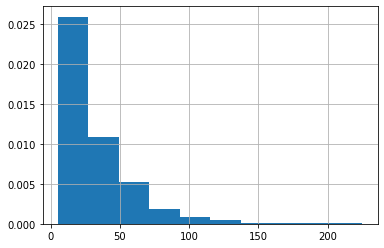

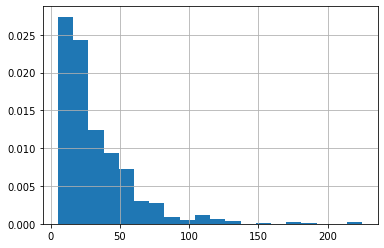

In [11]:
# Histogramme      #boxplot
linked["price"].hist(density=True)
plt.show()

# Histogramme plus beau
linked["price"].hist(density=True,bins=20)
plt.show()


## 2.3 analyse du prix

In [12]:
linked[["price"]].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


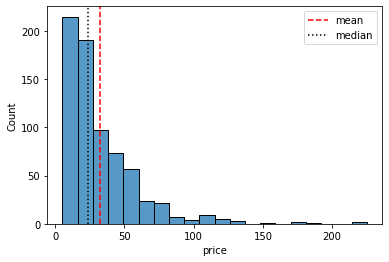

In [13]:
mean =  linked['price'].mean()
med =  linked['price'].median()
sns.histplot(data = linked["price"], bins=20)
plt.axvline(mean, color="red", linestyle="--", label='mean')
plt.axvline(med, color="black", linestyle=":", label='median')
plt.legend()

In [14]:
effectifs = linked["price"].value_counts(bins=4)
modalites = effectifs.index 
tab = pd.DataFrame(modalites, columns = ["price"])
tab["number"] = effectifs.values
tab["proportion"] = tab["number"] / len(linked)
display(tab)

,price,number,proportion
0,"(4.979, 60.15]",634,0.887955
1,"(60.15, 115.1]",66,0.092437
2,"(115.1, 170.05]",9,0.012605
3,"(170.05, 225.0]",5,0.007003


In [15]:
tab = tab.sort_values("price") # tri des valeurs de la variable X (croissant)
tab["added_prop"] = tab["proportion"].cumsum() #calcul de la frequence cumulée
display(tab)

,price,number,proportion,added_prop
0,"(4.979, 60.15]",634,0.887955,0.887955
1,"(60.15, 115.1]",66,0.092437,0.980392
2,"(115.1, 170.05]",9,0.012605,0.992997
3,"(170.05, 225.0]",5,0.007003,1.000000


## 2.4 Mesure de la tendance centrale

In [16]:
mode = linked["price"].mode()
print(f"le mode est la valeur que l'on retrouve le plus souvent dans notre jeu de données.\nle mode est de {round(mode[0])}")

le mode est la valeur que l'on retrouve le plus souvent dans notre jeu de données.
le mode est de 19


## 2.5 Mesures de dispersion

In [17]:
variance = linked["price"].var(ddof=0)
print(f"La variance est la moyenne des ecarts elevés au carré.\n"
      f"Ici la variance est donc de {round(variance)}.")

La variance est la moyenne des ecarts elevés au carré.
Ici la variance est donc de 772.


In [18]:
# la deviation standard correspond a l'ecart moyen réel entre les données, soit la racine carré de la variance.
st_dev= linked['price'].std()
print(f"la deviation standard de la colonne 'price' est de {round(st_dev, 1)}")

la deviation standard de la colonne 'price' est de 27.8


L'ecart interquartile est la difference entre le premier quartile et le 3e.  
Toutes les valeurs depassant 1.5 fois l'ecart interquartile sont considerées comme aberrantes

In [19]:
# Detection numerique des outliers: 
Q1 = linked["price"].quantile(q=0.25, interpolation="midpoint")
Q3 = linked["price"].quantile(q=0.75, interpolation="midpoint")
Iq = Q3 - Q1

Outliers_Inf_limit = Q1-1.5 * Iq
Outliers_Sup_limit = Q3+1.5 * Iq

Outliers_Inf = linked["price"] < Outliers_Inf_limit
Outliers_Sup = linked["price"] > Outliers_Sup_limit

print(f"Limite pour les outliers inferieurs:\n {Outliers_Inf_limit}")
print(f"Les indexs des outliers inferieurs sont:\n{np.where(Outliers_Inf)[0]}")

print(f"Limite pour les outliers superieurs:\n{Outliers_Sup_limit}")
print(f"Les indexs des outliers superieurs sont:\n{np.where(Outliers_Sup)[0]}")
display(linked.loc[(linked["price"]>84.05), ("price","post_title")])


Limite pour les outliers inferieurs:
 -27.975
Les indexs des outliers inferieurs sont:
[]
Limite pour les outliers superieurs:
84.22500000000001
Les indexs des outliers superieurs sont:
[ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]


,price,post_title
63,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
65,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
199,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
201,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
205,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
218,176.0,Cognac Frapin VIP XO
219,108.5,Cognac Frapin Château de Fontpinot XO
221,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
222,104.0,Cognac Frapin Cigar Blend
227,109.6,Château de Meursault Puligny-Montrachet 1er Cr...


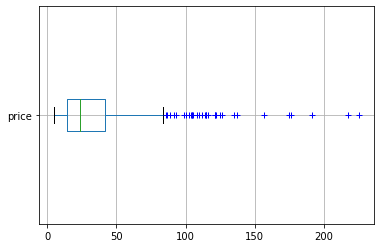

In [20]:
# representation visuelle des outliers

linked.boxplot(column="price", vert=False, sym='b+')
plt.show()


## 2.6 mesures de forme

In [21]:
#le coefficient d'asymetrie correspond à une mesure de l'asymétrie de la distribution d'une variable aléatoire réelle.
skewness = linked['price'].skew()
print(f"le coefficient d'asymétrie est de {round(skewness, 2)}\n" 
      f"la valeur etant positive, cela indique que la distribution est decalée a gauche de la mediane")

le coefficient d'asymétrie est de 2.58
la valeur etant positive, cela indique que la distribution est decalée a gauche de la mediane


# 3. conclusion

## 3.1 preparation des données

- Renseigner les données manquantes, autant que possible
- ne pas inclure de doublons, il n'est pas necessaire d'avoir 2 lignes par produit avec les meme données
- nommer correctement les colonnes

## 3.2 analyse des données

- Les valeurs considerées comme aberrantes d'un point de vue mathematique ne le sont pas compte tenu du contexte
- le prix moyen d'une bouteille est de 32 euros
- le prix median est de 23,5 euros
- 90 % des produits vendus ont un prix inférieur 60 euros.
- 98 % des produits ont un prix inférieur a 110 euros.